In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import ugradio as ug
from numpy import load
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy import mean
import scipy.signal as sps

# Demonstrating Aliasing 5.2-5.4

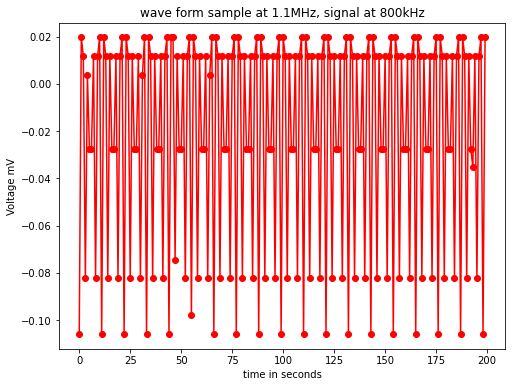

C:\Users\danie\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


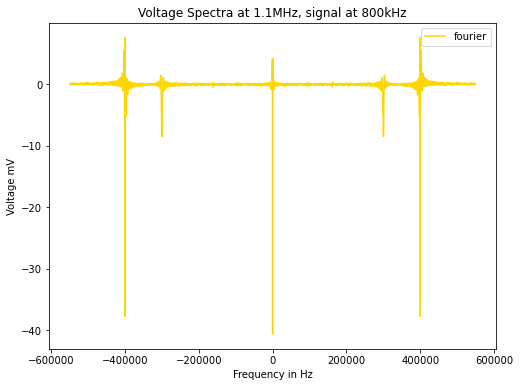

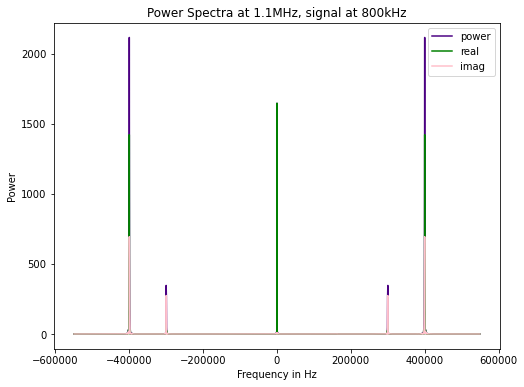

In [2]:
#%matplotlib notebook
Nsamples = 2048
sampfreq = 1.1e6
times = np.linspace(0, Nsamples/sampfreq,Nsamples)
dt = times[1]-times[0]

aliased_real = np.load("alia_real.npz")
alia = aliased_real["arr_0"]

alia_fft = np.fft.fft(alia)
freqfft = np.fft.fftfreq(Nsamples,dt)
real = alia_fft.real
imag = alia_fft.imag
pwr = np.abs(alia_fft)**2
pwr_real = np.abs(real)**2
pwr_imag = np.abs(imag)**2


plt.figure(figsize=(8,6))
plt.plot(alia[0:200],color='r',marker='o')
plt.title('wave form sample at 1.1MHz, signal at 800kHz')
plt.xlabel('time in seconds')
plt.ylabel('Voltage mV')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.fft.fftshift(freqfft),np.fft.fftshift(alia_fft),color='gold',label ='fourier')
plt.title('Voltage Spectra at 1.1MHz, signal at 800kHz')
plt.xlabel('Frequency in Hz')
plt.ylabel('Voltage mV')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.fft.fftshift(freqfft),np.fft.fftshift(pwr),color='indigo',label ='power')
plt.plot(np.fft.fftshift(freqfft),np.fft.fftshift(pwr_real),color='green',label ='real')
plt.plot(np.fft.fftshift(freqfft),np.fft.fftshift(pwr_imag),color='pink',label ='imag')
plt.title('Power Spectra at 1.1MHz, signal at 800kHz')
plt.xlabel('Frequency in Hz')
plt.ylabel('Power')
plt.legend()
plt.show()

# plt.figure(figsize=(8,6))
# plt.plot(np.fft.fftshift(freqfft),np.fft.fftshift(real),color='limegreen',label ='real')
# plt.plot(np.fft.fftshift(freqfft),np.fft.fftshift(imag),color='orange',label ='imaginary',alpha= 0.5)
# plt.title('Real vs imaginary 1.1MHz, signal at 800kHz')
# plt.xlabel('Freq?')
# plt.ylabel('volts?')
# plt.legend()
# plt.show()


# 5.7 The big, the bad, and the NOISE

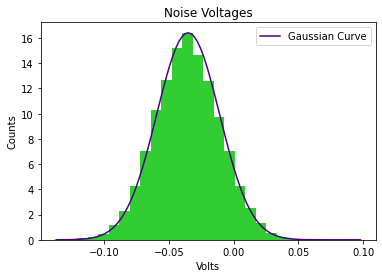

Mean voltage =  -0.035226334 Variance = 0.0005906547 Standard Dev = 0.024303388 max = 0.09803922 min = -0.13725491


In [3]:
# %matplotlib notebook
noise_data_22db_2 = np.load("noise_data_22db(2).npz")
noise_data_22dbp_2 = noise_data_22db_2["arr_0"]

variance = np.var(noise_data_22dbp_2)
Max = np.max(noise_data_22dbp_2)
Min = np.min(noise_data_22dbp_2)
#gaus = stats.norm.pdf(noise_data_22dbp_2,Min,Max)

plt.hist(noise_data_22dbp_2,bins=29,density=True,color='limegreen')
mean = np.mean(noise_data_22dbp_2)
STD = np.std(noise_data_22dbp_2)
x = np.linspace(Min,Max,100)
y = norm.pdf(x,mean,STD)
plt.plot(x,y,color='indigo',label = 'Gaussian Curve')
plt.title('Noise Voltages')
plt.xlabel('Volts')
plt.ylabel('Counts')
plt.legend()
plt.show()

print("Mean voltage = ",mean,"Variance =",variance,"Standard Dev =",STD,"max =",Max,"min =",Min)

In [4]:
noise_10blocks = np.load("noise_data_10blocks.npz")
noise_data_10blocks = noise_10blocks["arr_0"]
noise_data_10blocks.shape

fft_ls = []
pwr_ls =[]
def fourier(array):
    for i in range(10):
        a = array[i]
        b = np.fft.fft(a)
        fft_ls.append(b)
    return fft_ls

def power(fft):
    for i in range(len(fft)):
        a = fft[i]
        b = np.abs(a)**2
        pwr_ls.append(b)
    return pwr_ls
fn = fourier(noise_data_10blocks)
pn = power(fn)


def ACF(x):
    result = np.correlate(x, x, mode='full')
    result = result[len(result)//2:]
    return result/result[0]


# plt.figure(figsize=(8,6))
# for i in range(10):
#     plt.hist(pn[i],label=f"nblock={i}")
#     plt.legend()
# plt.show()

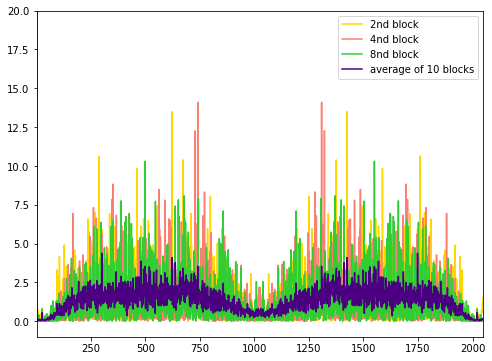

In [5]:
#post de-attenuation
noise_10blocks_new = np.load("noise_data_10blocks(-10db).npz")
noise_data_10blocks_new = noise_10blocks_new["arr_0"]
noise_data_10blocks_new.shape

fn_new = fourier(noise_data_10blocks_new)
pn_new = power(fn_new)

lis = pn_new[0] 
for i in range(9):
    s = pn_new[i+1]
    final = s + lis
    lis = final
    
pn_new_avg = lis/10

plt.figure(figsize=(8,6))
plt.plot(pn_new[1],label="2nd block",color='gold')
plt.plot(pn_new[3],label="4nd block",color='salmon')
plt.plot(pn_new[7],label="8nd block",color='limegreen')
plt.plot(pn_new_avg,label='average of 10 blocks',color='indigo')
plt.xlim(1,2048)
plt.ylim(-1,20)
plt.legend()
plt.show()

# Auto Correlation Failure

C:\Users\danie\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


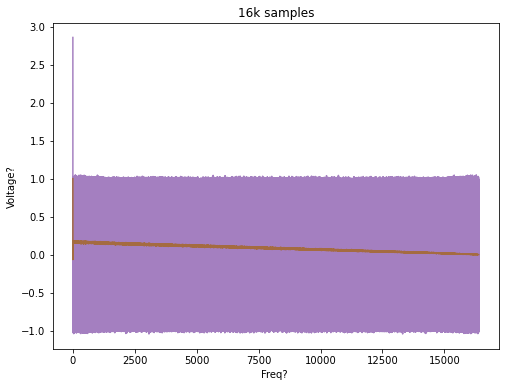

In [6]:
noise_16k = np.load("noise_data_16k.npz")
data16k = noise_16k["arr_0"]
freq16k = np.fft.fftfreq(len(noise_16k["arr_1"]))
freq16 = np.fft.fftshift(freq16k)

data16kfft = np.fft.fft(np.abs(data16k)**2)
data16kffts = np.fft.fftshift(data16kfft)
power16 = np.abs(data16kffts)**2
acf_fwd = np.fft.ifft(power16)
acf_dir = ACF(data16k)


plt.figure(figsize=(8,6))
plt.plot(acf_dir,color='gold')
plt.plot(acf_fwd,color='indigo',alpha=0.5)
plt.title('16k samples')
plt.xlabel('Freq? ')
plt.ylabel('Voltage?')
plt.show()

# 7.1 Mixer 1's Origin story

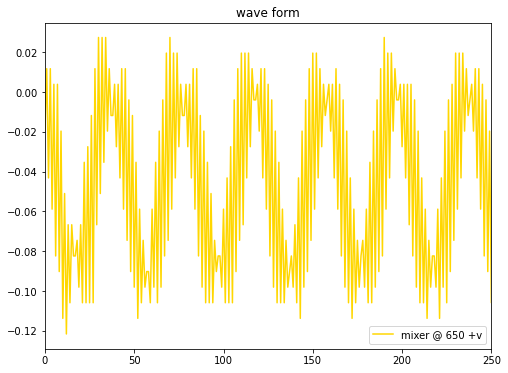

C:\Users\danie\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\danie\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


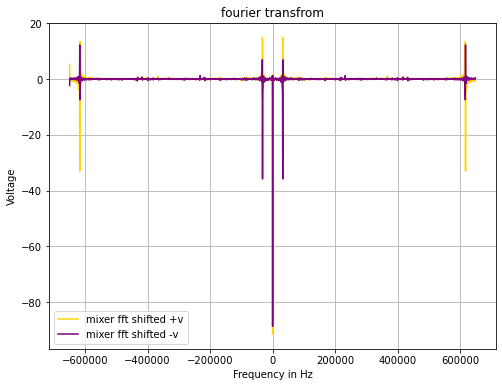

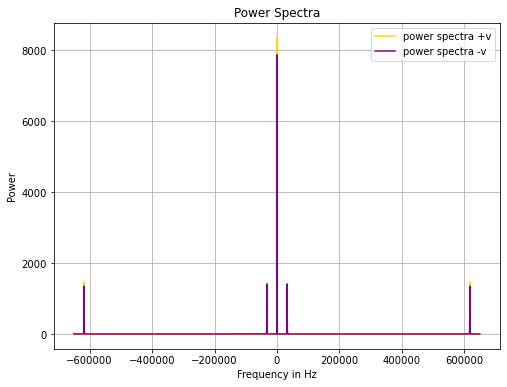

In [26]:
# %matplotlib notebook
mixer_650p = np.load("mixer_vlo+650kHz.npz")
mixer_650p_data = mixer_650p["arr_0"]
mixer_650n = np.load("mixer_vlo-650kHz.npz")
mixer_650n_data = mixer_650n["arr_0"]

Nsamples = 2048
sampfreq2 = 1.3e6
times2 = np.linspace(0, Nsamples/sampfreq2,Nsamples)
dt2 = times2[1]-times2[0]
freqfft2 = np.fft.fftfreq(Nsamples,dt2)

plt.figure(figsize=(8,6))
plt.title("wave form")
plt.plot(mixer_650p_data,label='mixer @ 650 +v',color='gold')
#plt.plot(mixer_650n_data,label='mixer @ 650 -v',color='purple')
plt.xlim(0,250)
plt.legend()
plt.show()

mixer_650p_fft = np.fft.fft(mixer_650p_data)
mixer_650p_ffts = np.fft.fftshift(mixer_650p_fft)

mixer_650n_fft = np.fft.fft(mixer_650n_data)
mixer_650n_ffts = np.fft.fftshift(mixer_650n_fft)

mixer_650p_pwr = np.abs(mixer_650p_ffts)**2
mixer_650n_pwr = np.abs(mixer_650n_ffts)**2

plt.figure(figsize=(8,6))
plt.title("fourier transfrom")
plt.grid()
plt.plot(np.fft.fftshift(freqfft2),mixer_650p_ffts,label='mixer fft shifted +v',color='gold')
plt.plot(np.fft.fftshift(freqfft2),mixer_650n_ffts,label='mixer fft shifted -v',color='purple') 
plt.xlabel('Frequency in Hz')
plt.ylabel('Voltage')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.title("Power Spectra")
plt.grid()
plt.plot(np.fft.fftshift(freqfft2),mixer_650p_pwr,label='power spectra +v',color='gold')
plt.plot(np.fft.fftshift(freqfft2),mixer_650n_pwr,label='power spectra -v',color='purple')
plt.xlabel('Frequency in Hz')
plt.ylabel('Power')
plt.legend()
plt.show()

# 7.2 to Log or not to Log Power Spectra

In [8]:
# # examining the positive # 
# plt.figure(figsize=(8,6))
# plt.title('power spectra in log y scale')
# plt.yscale("log")
# #plt.plot(np.fft.fftshift(freqfft2),np.fft.fftshift(mixer_650p_pwr),label='power spectra +v',color='blue')
# plt.plot(np.fft.fftshift(freqfft2),np.fft.fftshift(mixer_650n_pwr),label='power spectra -v',color='gold',alpha=0.5)
# plt.axvline(32500,ls='--',color= 'red',label='difference',lw = 3)
# plt.axvline(617500,ls='--',color= 'green',label='sum',lw=3 )
# plt.xlabel('Frequency')
# plt.ylabel('Power')
# plt.legend()
# plt.show()




# # The -v data is aliased due to nyquist criterion since 617.5kHz * 2 < 1.3MHz sample freq which is why they overlap exaclty
# # with the +v since they have a difference of v


# 7.3 Mixer 2 Electric boogaloo

C:\Users\danie\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


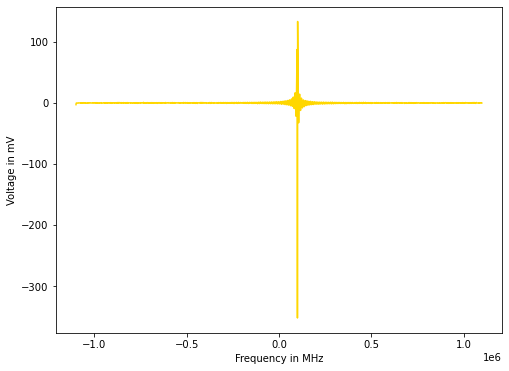

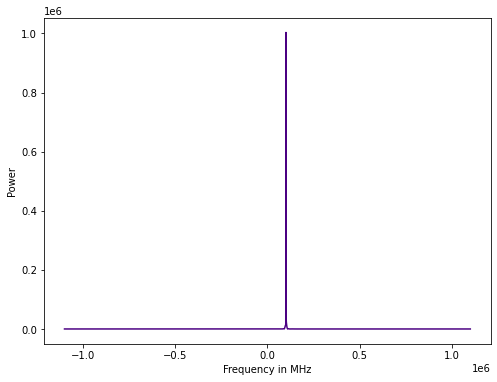

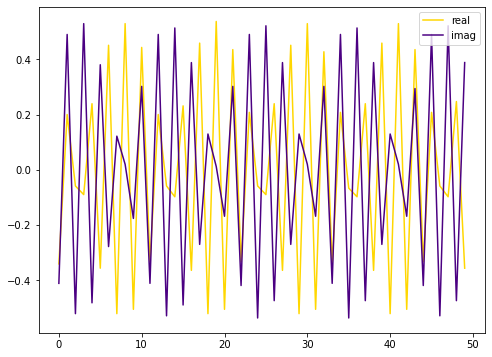

In [37]:
ssb2 = np.load("ssb2.npz")
ssb2_data = ssb2["arr_0"]
Nsamples = 2048
sampfreq3 = 2.2e6
times3 = np.linspace(0, Nsamples/sampfreq3,Nsamples)
dt3 = times3[1]-times3[0]
freqfft3 = np.fft.fftfreq(Nsamples,dt3)

ssb2_fft = np.fft.fft(ssb2_data)
ssb2_ffts = np.fft.fftshift(ssb2_fft)

ssb2_pwr = np.abs(ssb2_ffts)**2

real2 = ssb2_data.real
imag2 = ssb2_data.imag
imag_fft2 = np.fft.fft(imag2)
imag_ffts2 = np.fft.fftshift(imag_fft2)
imag_pwr2 = np.abs(imag_ffts2)**2

# plt.figure(figsize=(8,6))
# plt.plot(ssb2_data[0:50],color='r',marker='o')
# plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.fft.fftshift(freqfft3),np.fft.fftshift(ssb2_ffts),color='gold')
plt.xlabel('Frequency in MHz')
plt.ylabel('Voltage in mV')
#plt.axvline(100000,ls='--',color= 'k',lw = 3)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.fft.fftshift(freqfft3),np.fft.fftshift(ssb2_pwr),color='indigo')
plt.xlabel('Frequency in MHz')
plt.ylabel('Power')
#plt.axvline(100000,ls='--',color= 'k',lw = 3)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(real2[0:50],color='gold',label='real')
plt.plot(imag2[0:50],color='indigo',label='imag')
plt.legend()
plt.show()

# plt.plot(imag_pwr2)
# plt.show()

# 